In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# TensorFlow 버전 출력
print("TensorFlow Version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
#  tensorflow 2.10.0와 호환되는 버전
# cuDNN : 8.1  
# CUDA : 11.2

TensorFlow Version: 2.10.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [90]:
# 데이터 불러오기 
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
print(train_dataset.shape)
print(test_dataset.shape)

(10886, 12)
(6493, 9)


In [91]:
# datetime 컬럼을 datetime 타입으로 변환
train_dataset['datetime'] = pd.to_datetime(train_dataset['datetime'])
test_dataset['datetime'] = pd.to_datetime(test_dataset['datetime'])

# datetime에서 유용한 특성 추출
train_dataset['year'] = train_dataset['datetime'].dt.year
train_dataset['month'] = train_dataset['datetime'].dt.month
train_dataset['day'] = train_dataset['datetime'].dt.day
train_dataset['hour'] = train_dataset['datetime'].dt.hour
train_dataset['dayofweek'] = train_dataset['datetime'].dt.dayofweek

test_dataset['year'] = test_dataset['datetime'].dt.year
test_dataset['month'] = test_dataset['datetime'].dt.month
test_dataset['day'] = test_dataset['datetime'].dt.day
test_dataset['hour'] = test_dataset['datetime'].dt.hour
test_dataset['dayofweek'] = test_dataset['datetime'].dt.dayofweek


In [92]:
train_dataset.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

test_datetime = test_dataset['datetime'].copy()

test_dataset.drop(['datetime'], axis=1, inplace=True)
print(train_dataset.head())
print(test_dataset.head())
print(test_datetime.shape)

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   count  year  month  day  hour  dayofweek  
0     16  2011      1    1     0          5  
1     40  2011      1    1     1          5  
2     32  2011      1    1     2          5  
3     13  2011      1    1     3          5  
4      1  2011      1    1     4          5  
   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0

In [93]:
print(train_dataset.columns)
print(test_dataset.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour',
       'dayofweek'],
      dtype='object')
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')


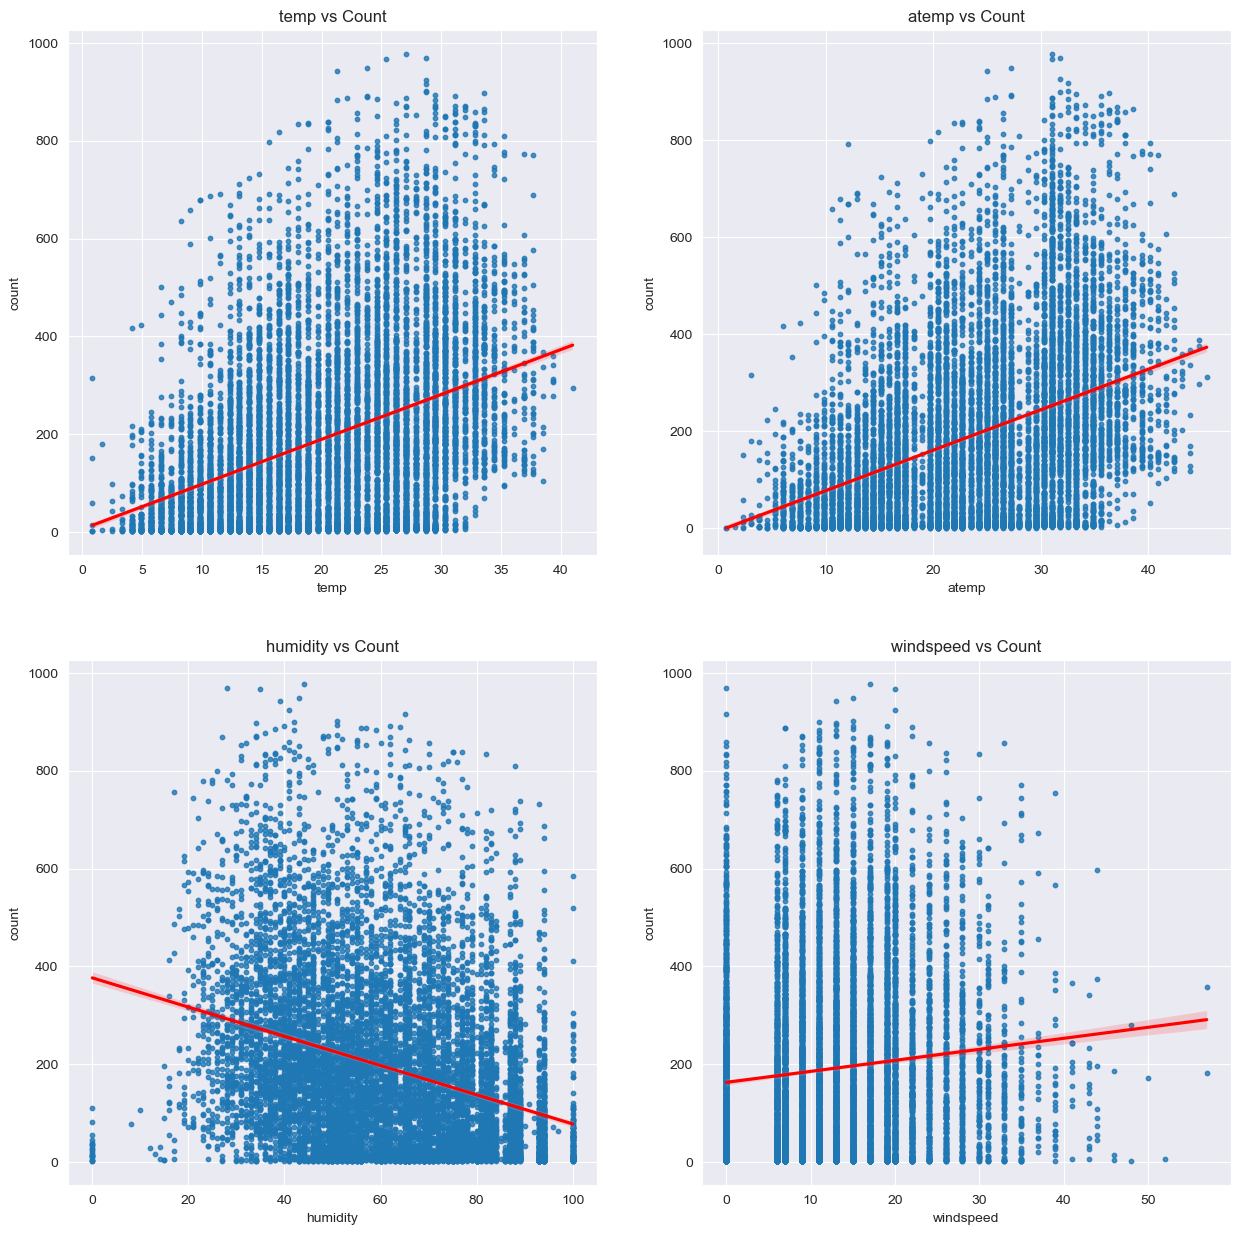

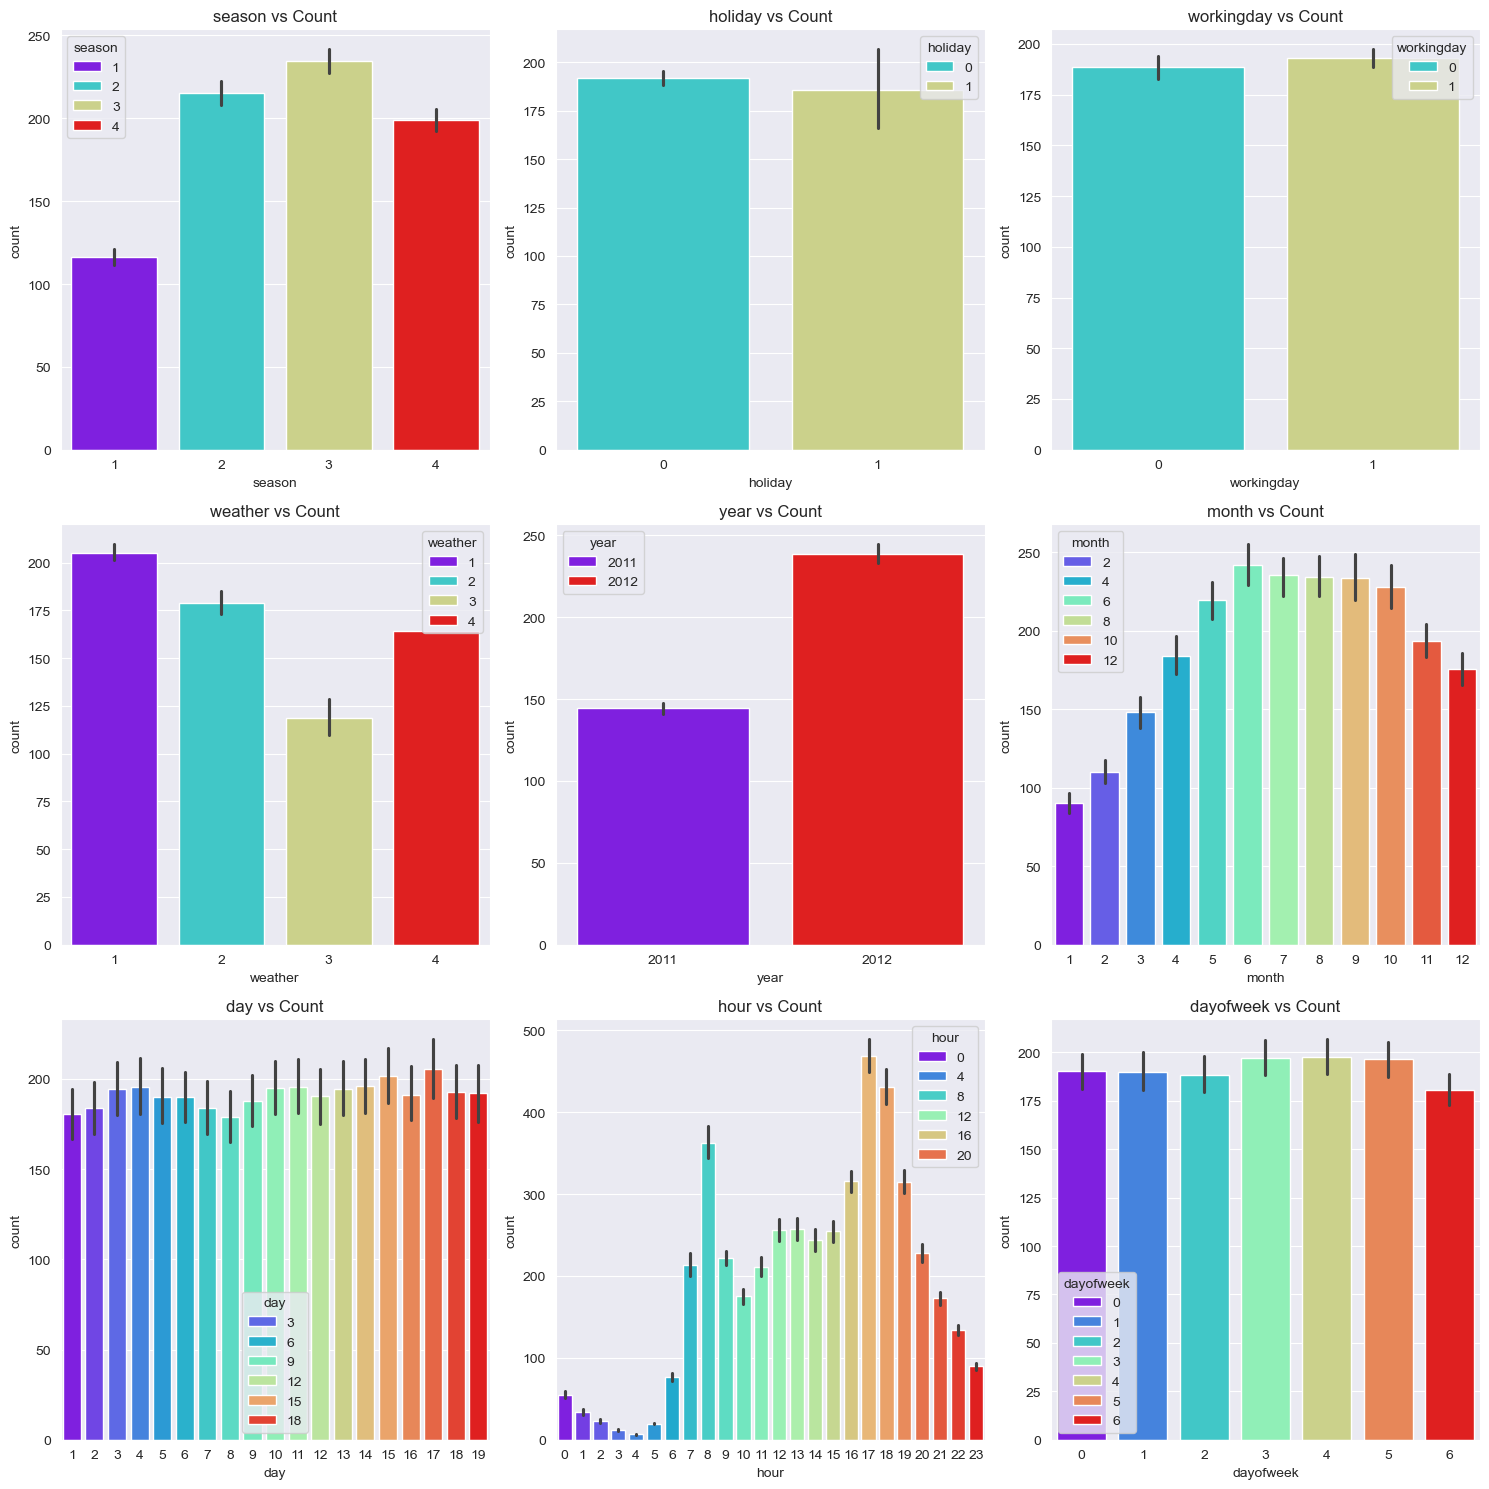

In [94]:
# 다른 모든 column과 count 간의 관계를 시각화해서 살펴보자
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed']
categorical_cols = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour', 'dayofweek']

plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=col, y='count', data=train_dataset, scatter_kws={'s': 10}, line_kws={"color": "red"})
    plt.title(f'{col} vs Count')
    
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=col, y='count', hue=col, data=train_dataset, palette='rainbow')
    plt.title(f'{col} vs Count')

plt.tight_layout()
plt.show()

In [7]:
# workingday, day, dayofweek : 별차이없음
# year: 2년치가 데이터가 너무 적음
# temp와 atemp는 거의 유사 둘중 하나만 사용

# train_dataset.drop(['atemp','workingday','day','dayofweek','year'], axis=1, inplace=True)
# test_dataset.drop(['atemp','workingday','day','dayofweek','year'], axis=1, inplace=True)
print(train_dataset.head())
print(test_dataset.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   count  year  month  day  hour  dayofweek  
0     16  2011      1    1     0          5  
1     40  2011      1    1     1          5  
2     32  2011      1    1     2          5  
3     13  2011      1    1     3          5  
4      1  2011      1    1     4          5  
   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       1        0           1        1  10.66  11.365        56    26.0027   
1       1        0           1        1  10.66  13.635        56     0.0000   
2       1        0

In [8]:
print(train_dataset.tail())
print(test_dataset.tail())

       season  holiday  workingday  weather   temp   atemp  humidity  \
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  count  year  month  day  hour  dayofweek  
10881    26.0027    336  2012     12   19    19          2  
10882    15.0013    241  2012     12   19    20          2  
10883    15.0013    168  2012     12   19    21          2  
10884     6.0032    129  2012     12   19    22          2  
10885     8.9981     88  2012     12   19    23          2  
      season  holiday  workingday  weather   temp   atemp  humidity  \
6488       1        0           1        2  10.66  12.880        60   
6489       1        0           1        2  10.66  12.880  

In [52]:
print(train_dataset.shape)
print(test_dataset.shape)

(10886, 14)
(6493, 13)


In [53]:
# 데이터 인코딩 먼저 해야할것 같음
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# numerical_cols = ['temp', 'humidity', 'windspeed']
# categorical_cols = ['season', 'holiday', 'weather', 'month', 'hour']
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed']
categorical_cols = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour', 'dayofweek']

# Train과 Test 데이터를 합쳐서 고유 범주 통합
combined_data = pd.concat([train_dataset[categorical_cols], test_dataset[categorical_cols]])

# OneHotEncoder 
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
onehot_encoder.fit(combined_data)  # Train과 Test 데이터를 모두 사용해 학습

train_encoded = onehot_encoder.transform(train_dataset[categorical_cols])
test_encoded = onehot_encoder.transform(test_dataset[categorical_cols])

# One-Hot Encoding 결과를 DataFrame으로 변환
train_encoded = pd.DataFrame(train_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))
test_encoded = pd.DataFrame(test_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

# 기존 데이터프레임에서 범주형 열 제거하고 새 열 추가
train_dataset = pd.concat([train_dataset.drop(columns=categorical_cols), train_encoded], axis=1)
test_dataset = pd.concat([test_dataset.drop(columns=categorical_cols), test_encoded], axis=1)

In [54]:
train_dataset.tail()

,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,holiday_0,...,hour_21,hour_22,hour_23,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
10881,15.58,19.695,50,26.0027,336,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10882,14.76,17.425,57,15.0013,241,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10883,13.94,15.910,61,15.0013,168,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10884,13.94,17.425,61,6.0032,129,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10885,13.12,16.665,66,8.9981,88,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [65]:
# 수치형 변수 정규화
scaler = MinMaxScaler()
train_dataset[numerical_cols] = scaler.fit_transform(train_dataset[numerical_cols])
test_dataset[numerical_cols] = scaler.transform(test_dataset[numerical_cols])

In [67]:
train_dataset.tail()
print(train_dataset.shape)
print(test_dataset.shape)

(10886, 9)
(6493, 8)
(6493,)


In [16]:
# # 시계열 데이터형태로 만들기 위해 sliding window 함수 생성
# import numpy as np
# 
# def sliding_window(dataset, timestep=5, is_train=True):
#     x = []
#     y = []
#     for i in range(timestep, len(dataset)):
#         if is_train:
#             x.append(dataset.iloc[(i-timestep):i].drop('count', axis=1).values)
#             y.append(dataset.iloc[i]['count'])
#         else:
#             x.append(dataset.iloc[(i-timestep):i].values)
#     return np.array(x), np.array(y) if is_train else np.array(x)

### 모델 구성

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras_tuner import HyperModel, RandomSearch, Objective
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

In [23]:
# callback
import IPython
class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)
early_stopping = EarlyStopping(patience=40, monitor='val_root_mean_squared_error',
                               restore_best_weights=True)
# if not os.path.exists('checkpoints'):
#     os.makedirs('checkpoints')
# checkpoint = ModelCheckpoint('checkpoints/checkpoint_{epoch}.h5',
#                              monitor='val_loss',
#                              save_best_only=False, mode='min')
# best_checkpoint = ModelCheckpoint('checkpoints/best_model.h5',
#                              monitor='val_loss',
#                              save_best_only=True, mode='min')
# tensorboard = TensorBoard(log_dir='logs', 
#                           histogram_freq=1, write_graph=True,write_images=True)
# callbacks = [early_stopping, checkpoint, best_checkpoint, tensorboard, ClearTrainingOutput()]
callbacks = [ClearTrainingOutput(), early_stopping]


In [24]:
# 논문 일부: The number of epochs was set to a maximum  value of 1000, 
# because the training strategy used the Early  Stopping method 
# for determining the optimum epoch number  minimizing the RMSE of the validation set, 
# restoring the  weights of the best model at the end of the learning process.

# # RMSE 계산
# def root_mean_squared_error(y_true, y_pred):
#     return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [25]:
# 모델을 정의해보자
class BikeSharingModel(HyperModel):
    def __init__(self, timestep, features):
        self.timestep = timestep
        self.features = features
        
    def build(self, hp):
        model = tf.keras.Sequential()
        
        # 첫번째 레이어
        # 논문 일부: The number of neurons for the input layer is equal to 64 or 128; 
        model.add(layers.Bidirectional(layers.LSTM(units=hp.Choice("layer1-unit", [64, 128]), 
                              return_sequences=False, 
                              input_shape=(self.timestep, self.features))))
        # dropout 설정, 
        # 논문 일부: Also, the dropout rate for each layer was optimized with the values 0.1, 0.25, 0.5
        model.add(layers.Dropout(rate=hp.Choice('layer1-dropout', [0.1, 0.25, 0.5])))
        
        # 두번째 레이어
        # 논문 일부: for the 2nd layer 64, 32;
        model.add(layers.Dense(units=hp.Choice("layer2-unit", [64, 32]), activation='relu'))
        model.add(layers.Dropout(rate=hp.Choice('layer2-dropout', [0.1, 0.25, 0.5])))
        
        # 세번째 레이어
        # 논문 일부: for the 3rd layer 16, 32.
        model.add(layers.Dense(units=hp.Choice("layer3-unit", [16, 32]), activation='relu'))
        model.add(layers.Dropout(rate=hp.Choice('layer3-dropout', [0.1, 0.25, 0.5])))
        
        # 마지막 레이어
        # 논문 일부: The last layer has only one neuron with a sigmoid activation function, in order
        # to obtain a value in the range 0, 1 
        # (the input data for the models were normalized using a Min Max scaler)
        model.add(layers.Dense(1, activation='sigmoid'))
        
        # 논문 일부: The number of epochs was set to a maximum  value of 1000, 
        # because the training strategy used the Early  Stopping method 
        # for determining the optimum epoch number  minimizing the RMSE of the validation set, 
        # restoring the  weights of the best model at the end of the learning process.
        # 논문 일부 : MSE was selected as loss function to be monitored during the optimization. 
        model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', 
                                                             [0.05, 0.005, 0.0005, 0.00005])), 
                      loss='mse', metrics=[metrics.RootMeanSquaredError()])
        return model

In [26]:
features = list(test_dataset.columns)
print(features)

features_nums = len(features)
print(features)

X = train_dataset[features]
y = np.log1p(train_dataset['count'])


print(X.shape, y.shape)

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

x_train = x_train.values
x_val = x_val.values

scaler2 = MinMaxScaler()
y_train = scaler2.fit_transform(y_train.values.reshape(-1, 1))
y_val = scaler2.transform(y_val.values.reshape(-1, 1))

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)
print(type(x_train), type(y_train), type(x_val), type(y_val))

# print(x_train.describe())
# print(x_val.describe())

['temp', 'atemp', 'humidity', 'windspeed', 'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'year_2011', 'year_2012', 'month_1', 'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'day_1', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_2', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_3', 'day_30', 'day_31', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'hour_0', 'hour_1', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_2', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'dayofweek_0', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofwe

In [27]:
class HyperparameterSearcher:
    def __init__(self, x_train, y_train, x_val, y_val, features_nums, project_name):
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.project_name = project_name
        
        self.features_nums = features_nums
        self.best_dict = {}
        self.tuners = {}
        self.cache = {}
        self.history_dict = {}
        
    def search_hyper(self, timestep, epochs, batch_size_list):
        index = 0 
        for ts in timestep:
            if ts not in self.tuners:
                bikeModel = BikeSharingModel(ts, self.features_nums)
                tuner = RandomSearch(
                    bikeModel,
                    objective=Objective("val_root_mean_squared_error", direction="min"),
                    max_trials=10,
                    executions_per_trial=1,
                    directory=self.project_name
                )
                self.tuners[ts] = tuner
            else:
                tuner = self.tuners[ts]
                
            # 최적 파라 찾기
            for bs in batch_size_list:
                print(f"index={index},timestep={ts}, batch_size={bs}")
                
                train_generator = TimeseriesGenerator(self.x_train, self.y_train, length=ts, batch_size=bs, shuffle=False)
                val_generator = TimeseriesGenerator(self.x_val, self.y_val, length=ts, batch_size=bs, shuffle=False)
                tuner.search(train_generator, 
                             epochs=epochs,
                             validation_data=val_generator,
                             callbacks=callbacks)
                # 최적의 hyper 값 불러오기
                best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
                self.best_dict[index] = {
                    "timestep": ts,
                    "epoch": epochs,
                    "batch_size": bs,
                    "hyper": best_hps
                }
                index += 1 
    def retrain_with_hyper(self):
        for k, v in self.best_dict.items():
            print("case:", v)
            case_timestep = v['timestep']
            case_epoch = v['epoch']
            case_batch_size = v['batch_size']
            case_hyper = v['hyper']
            
            if case_timestep not in self.cache:
                case_train_generator = TimeseriesGenerator(self.x_train, self.y_train, 
                                                           length=case_timestep, batch_size=case_batch_size, shuffle=False)
                case_val_generator = TimeseriesGenerator(self.x_val, self.y_val, 
                                                         length=case_timestep, batch_size=case_batch_size, shuffle=False)
                self.cache[case_timestep] = {
                    "train_generator": case_train_generator,
                    "val_generator": case_val_generator
                }
            else:
                case_train_generator = self.cache[case_timestep]["train_generator"]
                case_val_generator = self.cache[case_timestep]["val_generator"]
        
            model = self.tuners[case_timestep].hypermodel.build(case_hyper)
            history = model.fit(case_train_generator, 
                                epochs=case_epoch, 
                                validation_data=case_val_generator, callbacks=callbacks)
            self.history_dict[k] = history.history
        return self.history_dict
    
    def save_best_dict(self, csv_dir):
        df = pd.DataFrame.from_dict(self.best_dict, orient='index')
        
        # 'hyper' 컬럼을 분리하여 각 하이퍼파라미터를 개별 컬럼으로 추가
        hyper_params = pd.json_normalize(df['hyper'])
        df = pd.concat([df.drop('hyper', axis=1), hyper_params], axis=1)
        df.to_csv(csv_dir, index=False)

In [28]:
print("X_train min:", x_train.min(), "X_train max:", x_train.max())
print("Y_train min:", y_train.min(), "Y_train max:", y_train.max())

X_train min: 0.0 X_train max: 1.0
Y_train min: 0.0 Y_train max: 1.0


In [29]:
timestep = [5, 10, 15, 23, 161]
# 논문 일부: The number of epochs was set to a maximum  value of 1000,
epochs = 1000
# 논문 일부: The batch size was set to 32 and 64 samples. 
batch_size_list = [32, 64]

searcher1 = HyperparameterSearcher(x_train, y_train, x_val, y_val, features_nums, '5_161_1000')
searcher1.search_hyper(timestep, epochs, batch_size_list)
searcher1.save_best_dict("1000_hyperparams.csv")

index=2,timestep=10, batch_size=32
index=3,timestep=10, batch_size=64
Reloading Tuner from 5_161_1000\untitled_project\tuner0.json
index=4,timestep=15, batch_size=32
index=5,timestep=15, batch_size=64
Reloading Tuner from 5_161_1000\untitled_project\tuner0.json
index=6,timestep=23, batch_size=32
index=7,timestep=23, batch_size=64
Reloading Tuner from 5_161_1000\untitled_project\tuner0.json
index=8,timestep=161, batch_size=32
index=9,timestep=161, batch_size=64


In [30]:
history_dict = searcher1.retrain_with_hyper()

Epoch 1/1000
268/268 [==============================] - 8s 23ms/step - loss: 0.0529 - root_mean_squared_error: 0.2299 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2311
Epoch 2/1000
268/268 [==============================] - 5s 19ms/step - loss: 0.0452 - root_mean_squared_error: 0.2126 - val_loss: 0.0414 - val_root_mean_squared_error: 0.2035
Epoch 3/1000
268/268 [==============================] - 5s 19ms/step - loss: 0.0368 - root_mean_squared_error: 0.1918 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1672
Epoch 4/1000
268/268 [==============================] - 5s 19ms/step - loss: 0.0265 - root_mean_squared_error: 0.1627 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1326
Epoch 5/1000
268/268 [==============================] - 5s 19ms/step - loss: 0.0204 - root_mean_squared_error: 0.1428 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1152
Epoch 6/1000
268/268 [==============================] - 5s 19ms/step - loss: 0.0175 - root_mean_squared_error: 0.1324 - val_l

In [31]:
print(len(history_dict))

10


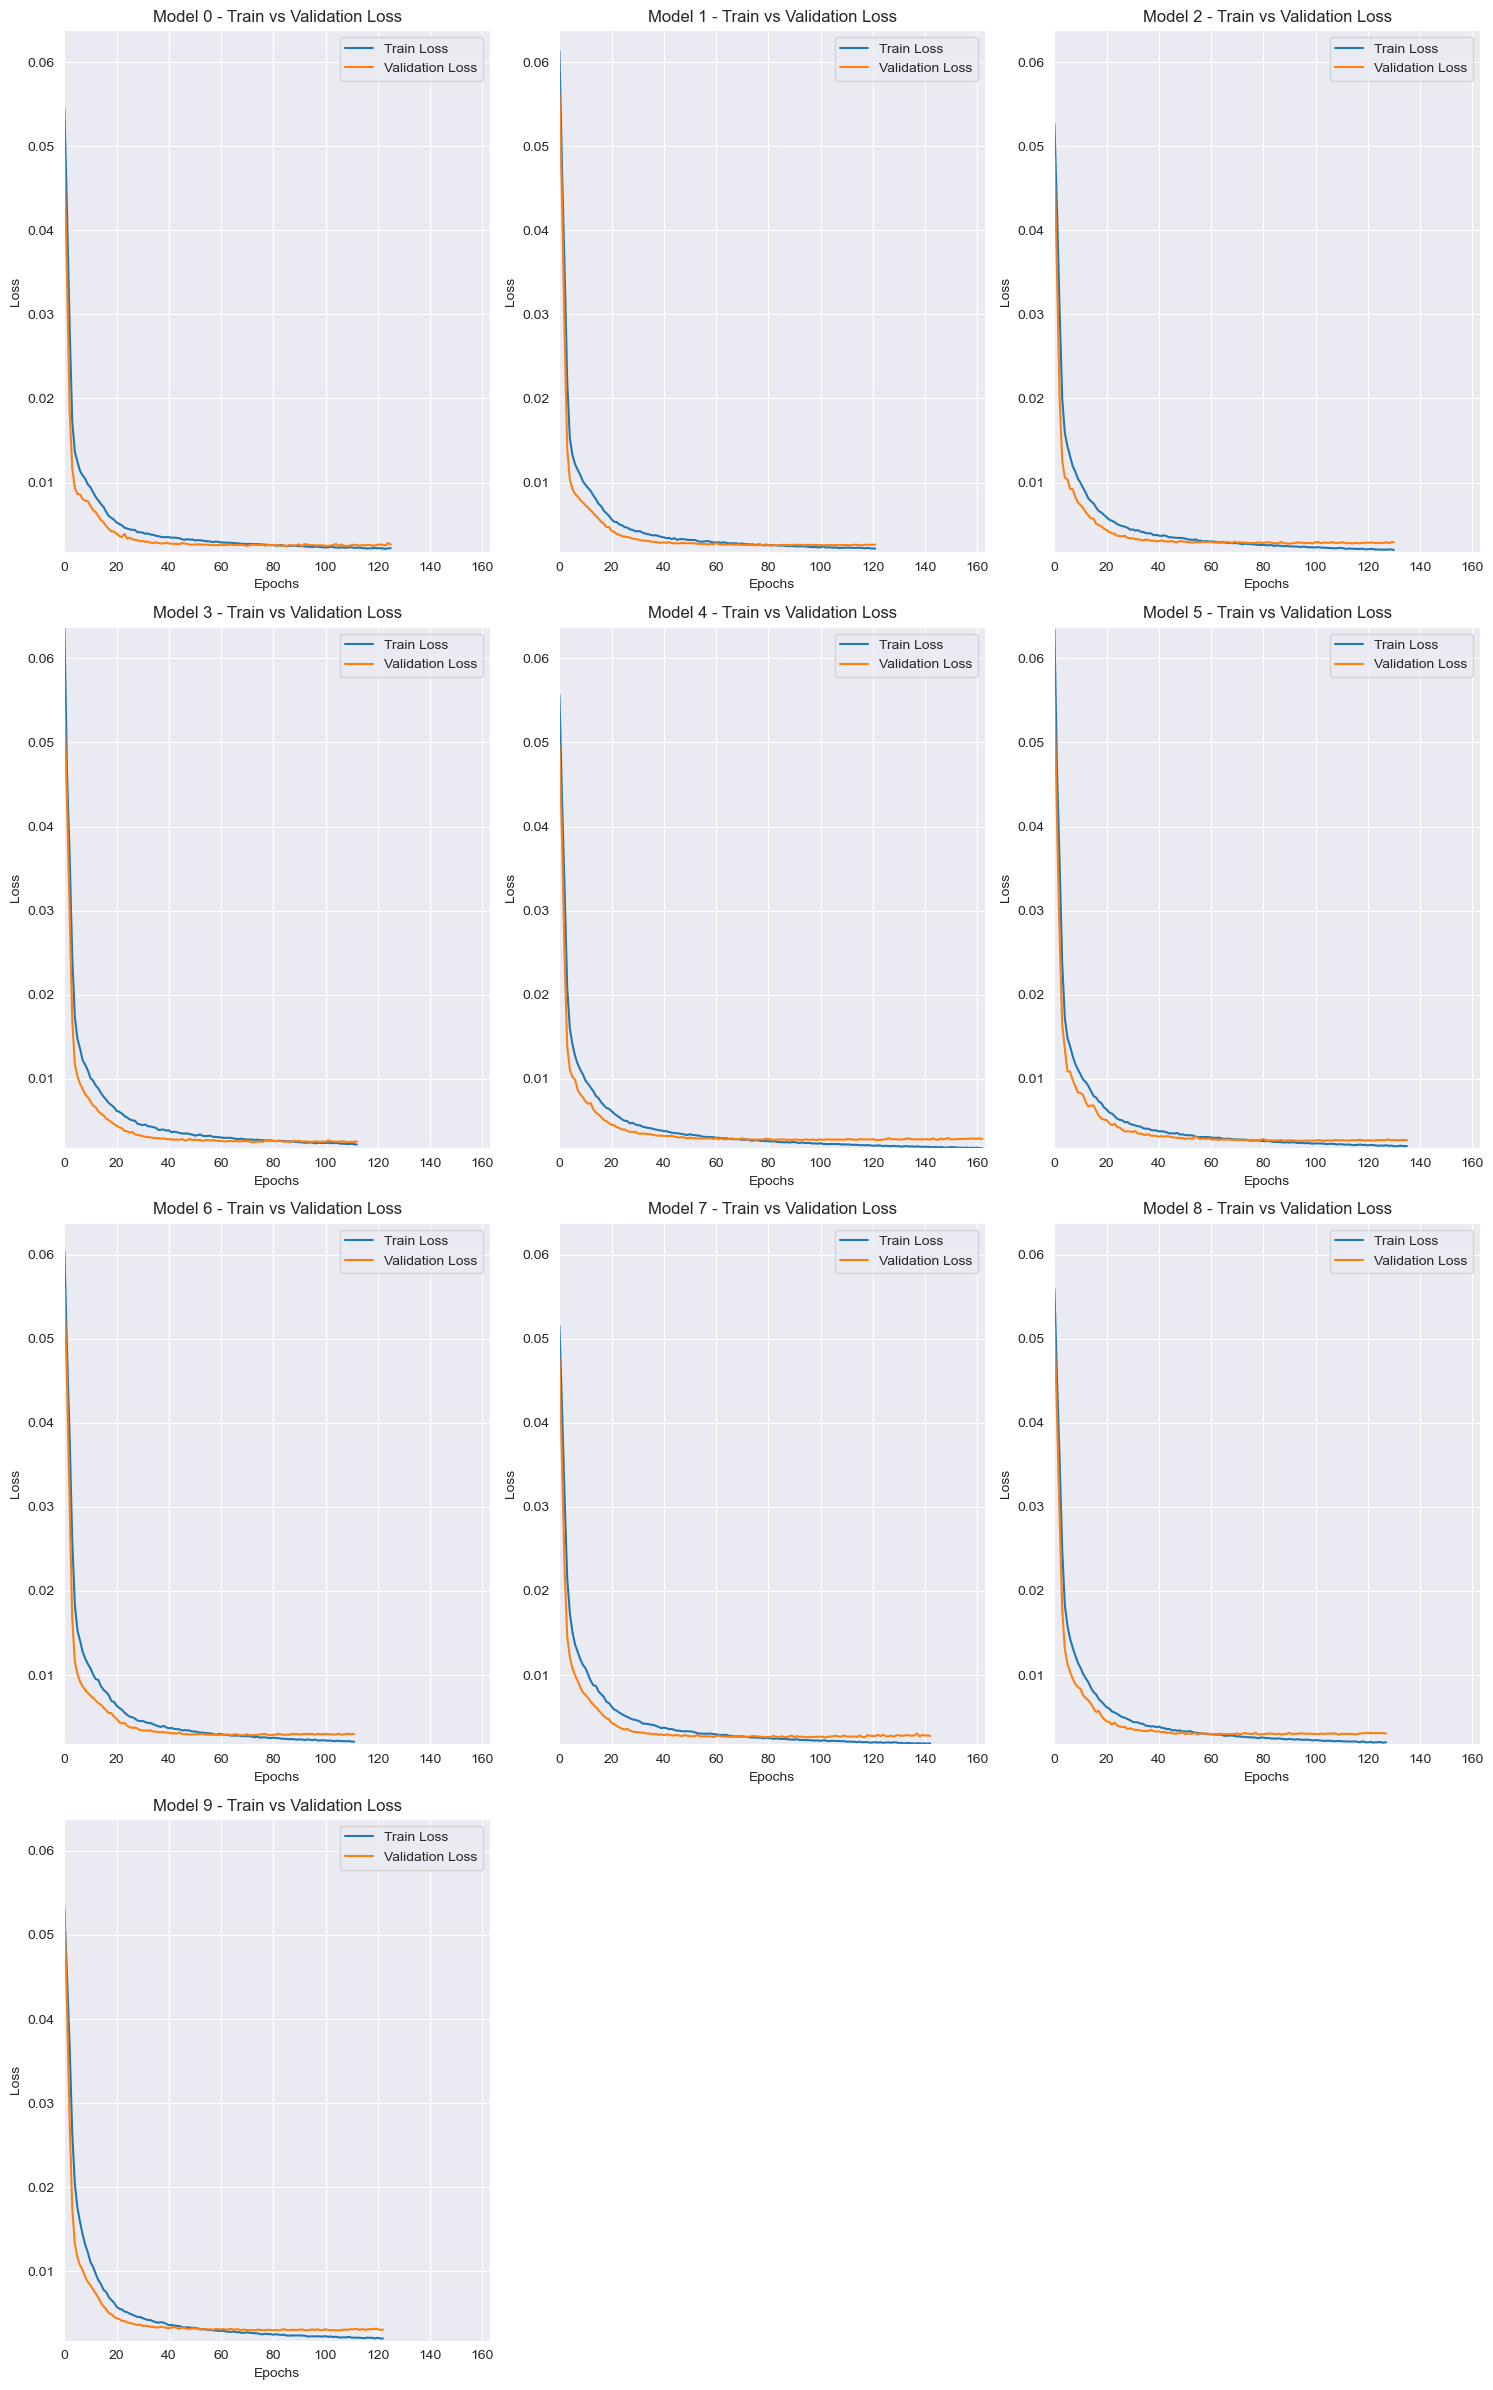

In [32]:
import matplotlib.pyplot as plt


# 모든 그래프의 x축과 y축 범위를 설정하기 위해 데이터의 최대/최소 값 계산
max_epochs = max(len(history['loss']) for history in history_dict.values())
max_loss = max(max(max(history['loss']), max(history['val_loss'])) for history in history_dict.values())
min_loss = min(min(min(history['loss']), min(history['val_loss'])) for history in history_dict.values())

# 총 몇 개의 그래프가 있는지 확인
num_plots = len(history_dict)

# 한 줄에 5개의 그래프를 배치할 수 있도록 subplot의 행, 열 계산
num_columns = 3
num_rows = (num_plots + num_columns - 1) // num_columns  # 필요한 행 수 계산

# 서브플롯 생성
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6 * num_rows))

# 각 그래프에 대해 데이터를 그리기
for index, (k, history) in enumerate(history_dict.items()):
    row = index // num_columns  # 행 번호
    col = index % num_columns   # 열 번호
    
    # axes[row, col]에 그래프 그리기
    ax = axes[row, col] if num_rows > 1 else axes[col]  # 한 행일 경우 axes가 1D 배열이므로 처리 다르게
    
    ax.plot(history['loss'], label='Train Loss')
    ax.plot(history['val_loss'], label='Validation Loss')
    ax.set_title(f"Model {k} - Train vs Validation Loss")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    
    # 모든 그래프의 x축과 y축 범위 동일하게 설정
    ax.set_xlim(0, max_epochs)
    ax.set_ylim(min_loss, max_loss)

# 나머지 빈 서브플롯을 비우기 (만약 그래프의 수가 num_columns로 나누어지지 않으면)
for i in range(num_plots, num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [84]:
# 1. 최적 모델 선택
best_model_id = None
lowest_val_rmse = float('inf')

for model_id, history in history_dict.items():
    min_val_rmse = min(history['val_root_mean_squared_error'])  # 각 모델의 최소 RMSE
    print(min_val_rmse, model_id)
    if min_val_rmse < lowest_val_rmse:
        lowest_val_rmse = min_val_rmse
        best_model_id = model_id

print(f"Best Model ID: {best_model_id}, Lowest Validation RMSE: {lowest_val_rmse}")

0.0493495836853981 0
0.05019840970635414 1
0.05238348990678787 2
0.04959511011838913 3
0.052111171185970306 4
0.05119088664650917 5
0.05323672294616699 6
0.05072123184800148 7
0.054095558822155 8
0.05450337380170822 9
Best Model ID: 0, Lowest Validation RMSE: 0.0493495836853981


In [85]:

# 최적 모델로 테스트 데이터 예측
best_model_params = searcher1.best_dict[best_model_id] 
best_timestep = best_model_params['timestep']
best_batch_size = best_model_params['batch_size']
best_best_hyper = best_model_params['hyper']

# 시작 부분에 패딩 추가
print(test_dataset.shape)
padding = np.zeros((best_timestep, test_dataset.shape[1]))  # 0으로 채운 패딩 생성
X_test_padded = np.vstack([padding, test_dataset.values]) 
print(X_test_padded.shape)

test_generator = TimeseriesGenerator(X_test_padded, np.zeros(len(X_test_padded)), 
                                      length=best_timestep, batch_size=best_batch_size)

best_model = searcher1.tuners[best_timestep].hypermodel.build(best_best_hyper)
test_pred_scaled = best_model.predict(test_generator)
test_pred_original = scaler2.inverse_transform(test_pred_scaled)  
test_pred_original = np.expm1(test_pred_original)
print(test_pred_original.shape)

submission = pd.DataFrame({
    'datetime': test_datetime,  # 테스트 데이터의 datetime 컬럼
    'count': test_pred_original.flatten()  # 예측값
})
submission.to_csv('submission.csv', index=False)

print('Submission file has been created.')

(6493, 8)
(6498, 8)
203/203 [==============================] - 1s 2ms/step
(6493, 1)
Submission file has been created.
